# Data Mining

## Homework 1. Aggregation, Visualisation & Relationships
Дата выдачи: 26.09.2021

Дедлайн: 30.09.2021 23:59 MSK

**Aggregation:**

* Make aggregation and save the result to the file ‘Aggr.sav’.
* Comment the results.
 

**Visual Binning:**

* Perform Visual Binning providing labels to the resulting values of the new variable.
* Make an appropriate charts of the new and original variables.
* Comment the results.
 

**Relationships:**

* Choose one or more appropriate methods to explore relationship between the two variables.
* Perform an analysis.
* Draw the conclusions regarding the relationship.
* Comment the results

In [1]:
import pandas as pd

data = pd.read_spss(r'C:\Users\zolotarev\Downloads\DM_-_Homework_1\customer_dbase.sav')
data

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,callid,callwait,forward,confer,ebill,hourstv,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,Zone 1,"50,000-249,999",Female,20.0,18-24,September,15.0,Some college,Managerial and Professional,...,No,Yes,Yes,Yes,No,13.0,No,No,Yes,No
1,0648-AIPJSP-UVM,Zone 5,"< 2,500",Male,22.0,18-24,May,17.0,College degree,Sales and Office,...,Yes,No,Yes,No,Yes,18.0,Yes,No,No,No
2,5195-TLUDJE-HVO,Zone 3,"2,500-9,999",Female,67.0,>65,June,14.0,High school degree,Sales and Office,...,No,No,No,No,No,21.0,Yes,No,No,No
3,4459-VLPQUH-3OL,Zone 4,"10,000-49,999",Male,23.0,18-24,May,16.0,Some college,Sales and Office,...,No,No,No,No,Yes,26.0,Yes,Yes,No,No
4,8158-SMTQFB-CNO,Zone 2,"50,000-249,999",Male,26.0,25-34,July,16.0,Some college,Sales and Office,...,Yes,Yes,Yes,Yes,No,27.0,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,Zone 2,"50,000-249,999",Male,68.0,>65,January,10.0,Did not complete high school,Managerial and Professional,...,No,No,No,No,No,19.0,Yes,No,No,No
4996,4699-LEPCCE-3UD,Zone 3,"10,000-49,999",Male,51.0,50-64,May,14.0,High school degree,Managerial and Professional,...,Yes,Yes,Yes,Yes,No,14.0,No,No,No,No
4997,8485-LLUICH-CVV,Zone 4,"< 2,500",Male,75.0,>65,August,17.0,College degree,Managerial and Professional,...,Yes,Yes,Yes,Yes,No,16.0,Yes,No,No,No
4998,9325-URAAUT-7FA,Zone 1,"> 250,000",Male,47.0,35-49,December,19.0,College degree,Sales and Office,...,No,No,No,No,Yes,24.0,Yes,No,No,No


## Aggregation

* Make aggregation and save the result to the file ‘Aggr.sav’.
* Comment the results.

Break variable - jobcat

Aggregated variable 1 - ed

Aggregated variable 2 - income

Aggregated variable 3 - debtinc

In [3]:
aggr_data = data[['jobcat', 'ed', 'income', 'debtinc']]
aggr_data

,jobcat,ed,income,debtinc
0,Managerial and Professional,15.0,31.0,11.1
1,Sales and Office,17.0,15.0,18.6
2,Sales and Office,14.0,35.0,9.9
3,Sales and Office,16.0,20.0,5.7
4,Sales and Office,16.0,23.0,1.7
...,...,...,...,...
4995,Managerial and Professional,10.0,196.0,8.0
4996,Managerial and Professional,14.0,83.0,15.0
4997,Managerial and Professional,17.0,108.0,10.8
4998,Sales and Office,19.0,189.0,10.8


In [41]:
aggr_table = aggr_data.groupby(['jobcat']).agg(['mean', 'min', 'max'])
aggr_table

ed                income       \
                                            mean  min   max       mean  min   
jobcat                                                                        
Agricultural and Natural Resources     14.301887  7.0  22.0  61.924528  9.0   
Managerial and Professional            14.857349  6.0  23.0  57.401297  9.0   
Operation, Fabrication, General Labor  14.165698  6.0  22.0  66.994186  9.0   
Precision Production, Craft, Repair    14.340708  6.0  22.0  62.595133  9.0   
Sales and Office                       14.650000  6.0  23.0  40.348780  9.0   
Service                                14.204839  6.0  22.0  65.225806  9.0   

                                                 debtinc             
                                          max       mean  min   max  
jobcat                                                               
Agricultural and Natural Resources      515.0   9.445283  0.4  29.4  
Managerial and Professional             642.0   9.988112  0.2  36.7  
Operation, Fabrication, General Labor   995.0  10.114535  0.0  37.5  
Precision Production, Craft, Repair     575.0  10.044027  0.1  43.1  
Sales and Office                        780.0   9.896098  0.1  38.2  
Service                                1073.0   9.962258  0.1  41.7

In [26]:

def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')

def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

aggr_table.style.\
apply(highlight_max, props='color:white;background-color:darkgreen', axis=0).\
apply(highlight_min, props='color:white;background-color:darkred', axis=0)

In [42]:
aggr_table.columns = ["_".join(a) for a in aggr_table.columns.to_flat_index()]
aggr_table

,ed_mean,ed_min,ed_max,income_mean,income_min,income_max,debtinc_mean,debtinc_min,debtinc_max
jobcat,,,,,,,,,
Agricultural and Natural Resources,14.301887,7.0,22.0,61.924528,9.0,515.0,9.445283,0.4,29.4
Managerial and Professional,14.857349,6.0,23.0,57.401297,9.0,642.0,9.988112,0.2,36.7
"Operation, Fabrication, General Labor",14.165698,6.0,22.0,66.994186,9.0,995.0,10.114535,0.0,37.5
"Precision Production, Craft, Repair",14.340708,6.0,22.0,62.595133,9.0,575.0,10.044027,0.1,43.1
Sales and Office,14.650000,6.0,23.0,40.348780,9.0,780.0,9.896098,0.1,38.2
Service,14.204839,6.0,22.0,65.225806,9.0,1073.0,9.962258,0.1,41.7


In [43]:
import pyreadstat
savFileName = 'Aggr.sav'
pyreadstat.write_sav(aggr_table, savFileName)

Regarding education both mean, min and max are similar to each other between different job categories.

We can observe that mean income between different job categories is not equal. It's likely to reject hypothesis about mean equality.

Speaking about debt income it is also quite similar between different job categories, although workers from Agricultural and Natural Resources have significantly lower mean and maximum debt income in comparison with other categories.


## Visual Binning

* Perform Visual Binning providing labels to the resulting values of the new variable.
* Make an appropriate charts of the new and original variables.
* Comment the results.

Variable - longmon

№ of intervals - 4

Type of intervals - equal width

In [44]:
vis_data = data[['longmon']]
vis_data

,longmon
0,6.50
1,8.90
2,28.40
3,6.00
4,3.05
...,...
4995,34.10
4996,10.40
4997,29.40
4998,7.95


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

[]

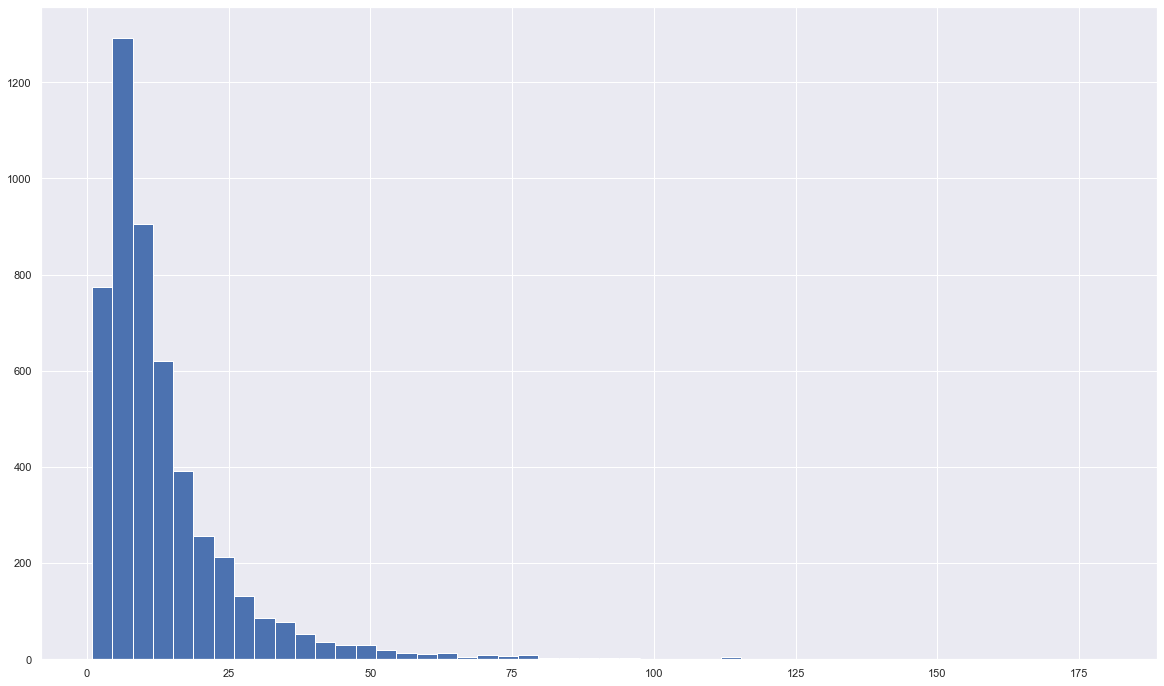

In [100]:
plt.figure(figsize=(20, 12))
plt.hist(vis_data.longmon, bins=50)
plt.plot()

Distribution of variable given is likely to be exponential based on visual analysis of histogram.

[]

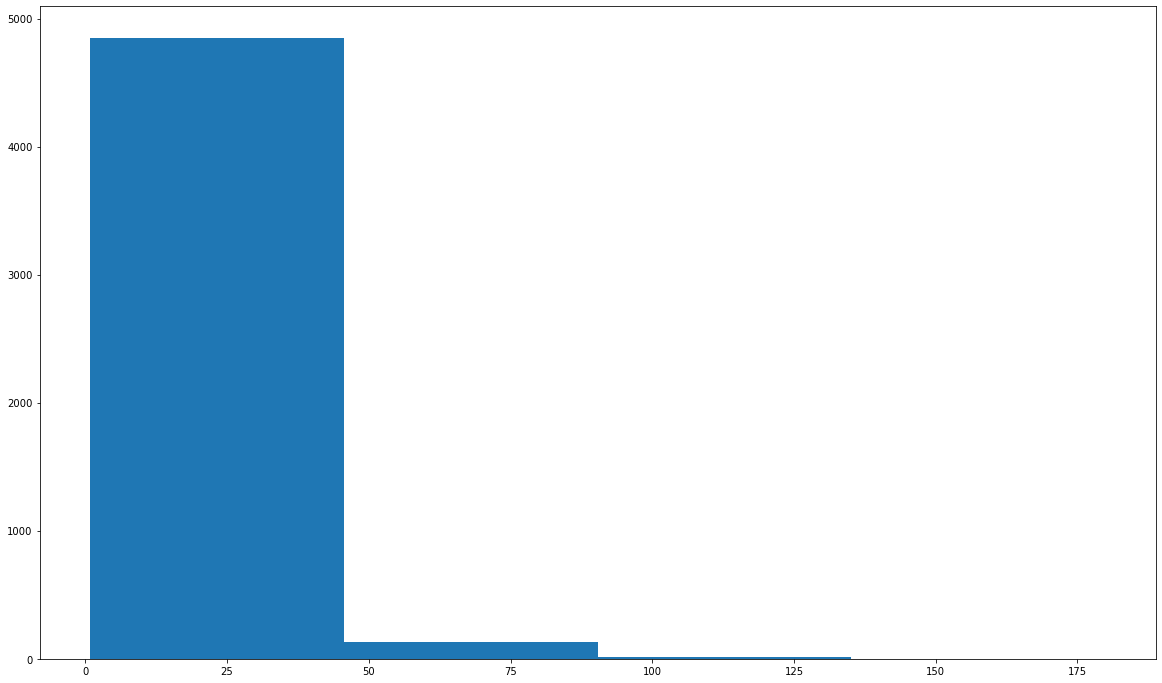

In [50]:
plt.figure(figsize=(20, 12))
plt.hist(vis_data, bins=4)
plt.plot()

The assignment is to draw 4 intervals of equal width. Basically, python function "matplotlib.pyplot.hist()" exactly complies with these conditions.

Let's create new variable to build boxplots for each interval for further analysis of "longmon"

<AxesSubplot:xlabel='bins', ylabel='value'>

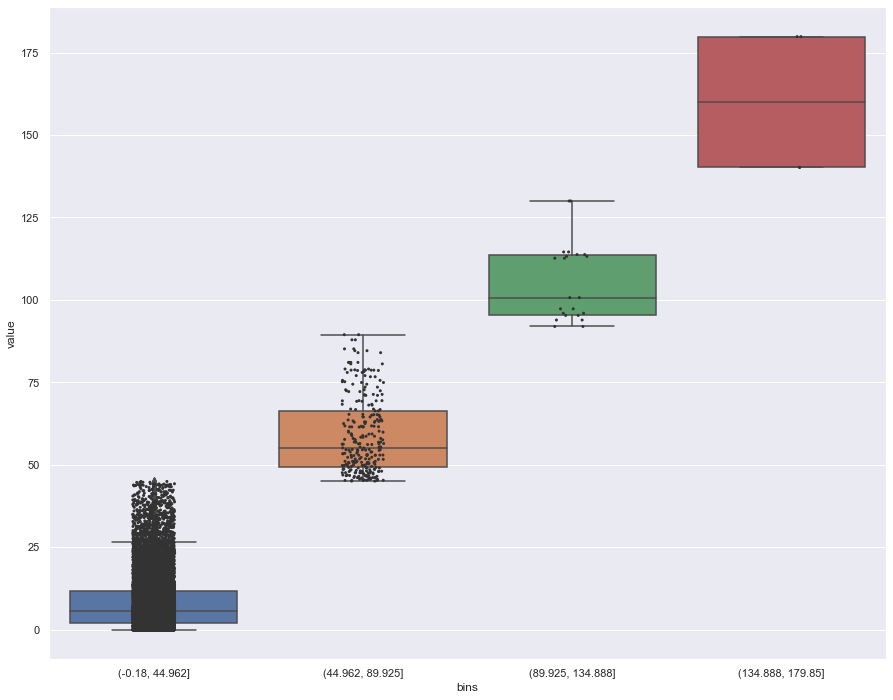

In [93]:
dlong = vis_data.melt(var_name='feature', value_name='value')
dlong['bins'] = pd.cut(dlong['value'], 4)
sns.stripplot(x="bins", y="value", data=dlong, jitter=0.1, size=3, color="0.2")
sns.boxplot(x="bins", y="value", data=dlong)

We can obtain that distributions of variable "longmon" is quite asymmetric as majority of observations is located in first bin whereas in last bin there are just a few points.

## Relationships

* Choose one or more appropriate methods to explore relationship between the two variables.
* Perform an analysis.
* Draw the conclusions regarding the relationship.
* Comment the results

Variable 1 - agecat

Variable 2 - spousedcat

In [101]:
rel_data = data[['agecat', 'spousedcat']]
rel_data

,agecat,spousedcat
0,18-24,Not married
1,18-24,Not married
2,>65,High school degree
3,18-24,College degree
4,25-34,High school degree
...,...,...
4995,>65,Not married
4996,50-64,Not married
4997,>65,Not married
4998,35-49,Some college


In [111]:
import numpy as np
pd.pivot_table(rel_data, index='agecat', columns='spousedcat', aggfunc=np.count_nonzero).style.\
apply(highlight_max, props='color:white;background-color:darkgreen', axis=0).\
apply(highlight_min, props='color:white;background-color:darkred', axis=0)

spousedcat,College degree,Did not complete high school,High school degree,Not married,Post-undergraduate degree,Some college
agecat,,,,,,
18-24,64,162,212,680,14,112
25-34,168,164,284,922,38,210
35-49,212,308,372,1250,72,230
50-64,200,286,388,1200,44,272
>65,144,292,322,1146,42,190


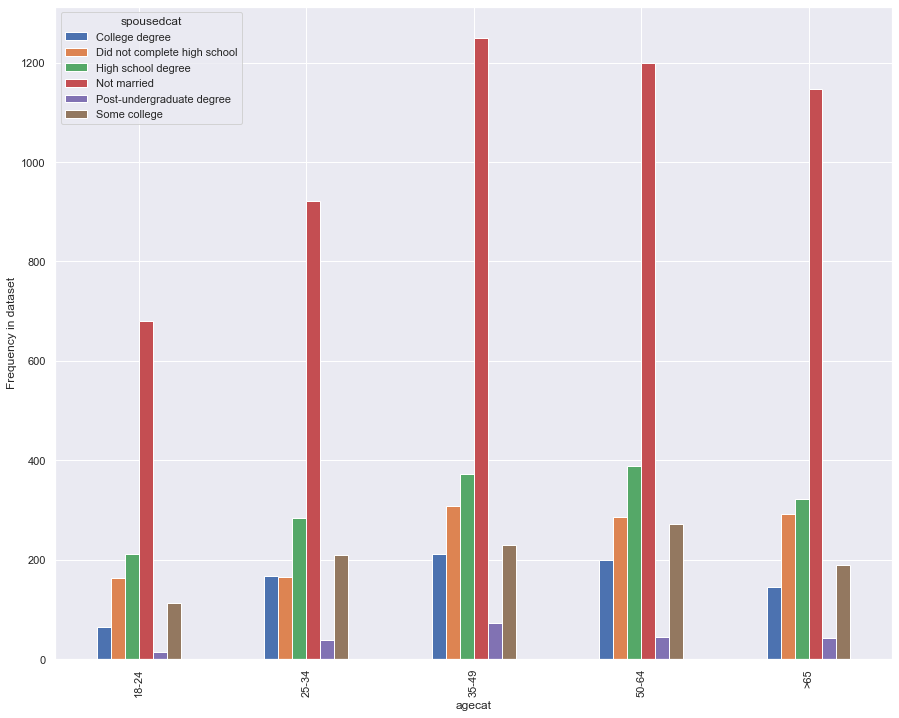

In [113]:
ax = pd.pivot_table(rel_data, index='agecat', columns='spousedcat', aggfunc=np.count_nonzero).plot(kind='bar')
ylab = ax.set_ylabel('Frequency in dataset')

Visually it seems that distribution of all education categories is quite similar between different age groups. Let's take chisquare test to check this hypothesis:

In [130]:
from scipy.stats import chisquare
print("Chi-square value for each category of age:", 
      chisquare(pd.pivot_table(rel_data, index='spousedcat', columns='agecat', 
                               aggfunc=np.count_nonzero)).statistic)
print("P-value of chi-square test for each category of age:", 
      chisquare(pd.pivot_table(rel_data, index='spousedcat', columns='agecat', 
                               aggfunc=np.count_nonzero)).pvalue.astype(np.float16))

print()

print("Chi-square value for each category of spouse:", 
      chisquare(pd.pivot_table(rel_data, index='agecat', columns='spousedcat', 
                               aggfunc=np.count_nonzero)).statistic)
print("P-value of chi-square test for each category of spouse:", 
      chisquare(pd.pivot_table(rel_data, index='agecat', columns='spousedcat', 
                               aggfunc=np.count_nonzero)).pvalue.astype(np.float16))

Chi-square value for each category of age: [1410.77813505 1678.96304591 2217.47954173 2099.35564854 2248.4494382 ]
P-value of chi-square test for each category of age: [0. 0. 0. 0. 0.]

Chi-square value for each category of spouse: [ 87.63451777  87.7689769   63.98986058 215.90919584  40.57142857
  68.97830375]
P-value of chi-square test for each category of spouse: [0.e+00 0.e+00 0.e+00 0.e+00 6.e-08 0.e+00]


Suchwise, we can observe that null hypothesis of Chi-Square Test rejects for each group of contingency table. To remind, null hypothesis of Chi-Square Test is "the categorical data has equal frequencies, there is no correlation between two variables". So, we can be sure that these variables are not independent.

In [139]:
import numpy as np
(pd.pivot_table(rel_data, index='agecat', columns='spousedcat', aggfunc=np.count_nonzero)/len(rel_data)).style.\
apply(highlight_max, props='color:white;background-color:darkgreen', axis=1).\
apply(highlight_min, props='color:white;background-color:darkred', axis=1)

spousedcat,College degree,Did not complete high school,High school degree,Not married,Post-undergraduate degree,Some college
agecat,,,,,,
18-24,0.012800,0.032400,0.042400,0.136000,0.002800,0.022400
25-34,0.033600,0.032800,0.056800,0.184400,0.007600,0.042000
35-49,0.042400,0.061600,0.074400,0.250000,0.014400,0.046000
50-64,0.040000,0.057200,0.077600,0.240000,0.008800,0.054400
>65,0.028800,0.058400,0.064400,0.229200,0.008400,0.038000


So, we can confirm that there was not a lot of spoused persons among all respondents. And the key conclusion is that the least amount of spouses is in category of people with post-undergraduate degree. This pattern allows to analyze character of sample given at stage of modeling.